In [11]:
import sys, os
sys.path.append(os.path.abspath('..')) # add path
from utils.VizSelector import VizSelector

import pandas as pd
from IPython.display import display
from ipywidgets import widgets, VBox, HTML

## Dataset

In [12]:
# from sklearn.datasets import fetch_california_housing
import pandas as pd 

# housing = fetch_california_housing(return_X_y=True, as_frame=True)[0]
# housing.to_csv("housing.csv", index=False)
housing = pd.read_csv("housing.csv")
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


# Selection 

## Column Selection

In [3]:
# # # Sample DataFrame
# # data = {
# #     'Name': ['Alice', 'Bob', 'Charlie', 'David'],
# #     'Age': [25, 30, 35, 40],
# #     'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']
# # }

# # df = pd.DataFrame(data)

# # Global variables to store selected columns
# selected_columns = {"Column 1": None, "Column 2": None}

# # Function to render the DataFrame with column selection
# def render_dataframe_with_column_selection(df):
#     global selected_columns
    
#     # Create dropdown widgets for column selection
#     dropdown1 = widgets.Dropdown(
#         options=tuple(df.columns),
#         value=df.columns[0],
#         description='Column 1',
#         disabled=False
#     )
    
#     dropdown2 = widgets.Dropdown(
#         options=tuple(df.columns),
#         value=df.columns[1],
#         description='Column 2',
#         disabled=False
#     )
    
#     # Create a button to generate the selected columns
#     button = widgets.Button(description="Generate")
    
#     # Output widget to display the selected columns
#     output = widgets.Output()
    
#     # Convert the DataFrame to an HTML table
#     html_df = df.to_html(index=False, classes='dataframe', border=0)

#     # Define the CSS for table alignment
#     css = """
#     <style>
#     .dataframe {
#         border-collapse: collapse;
#         width: 100%;
#     }
#     .dataframe th, .dataframe td {
#         border: 1px solid #ddd;
#         padding: 8px;
#     }
#     .dataframe th {
#         background-color: #f2f2f2;
#         text-align: center;
#     }
#     </style>
#     """
    
#     # Combine CSS and HTML table
#     html_content = widgets.HTML(value=css + html_df)
    
#     # Function to handle button click event
#     def on_button_click(b):
#         global selected_columns
#         selected_columns["Column 1"] = dropdown1.value
#         selected_columns["Column 2"] = dropdown2.value
#         output.clear_output()
#         with output:
#             display(f"Selected columns: {selected_columns}")
    
#     # Bind the button click event to the function
#     button.on_click(on_button_click)
    
#     # Display the dropdowns, HTML table (as a widget), button, and output
#     display(VBox([dropdown1, dropdown2, html_content, button, output]))

In [4]:
# Call the function to display the DataFrame with column selection
# render_dataframe_with_column_selection(housing.head())

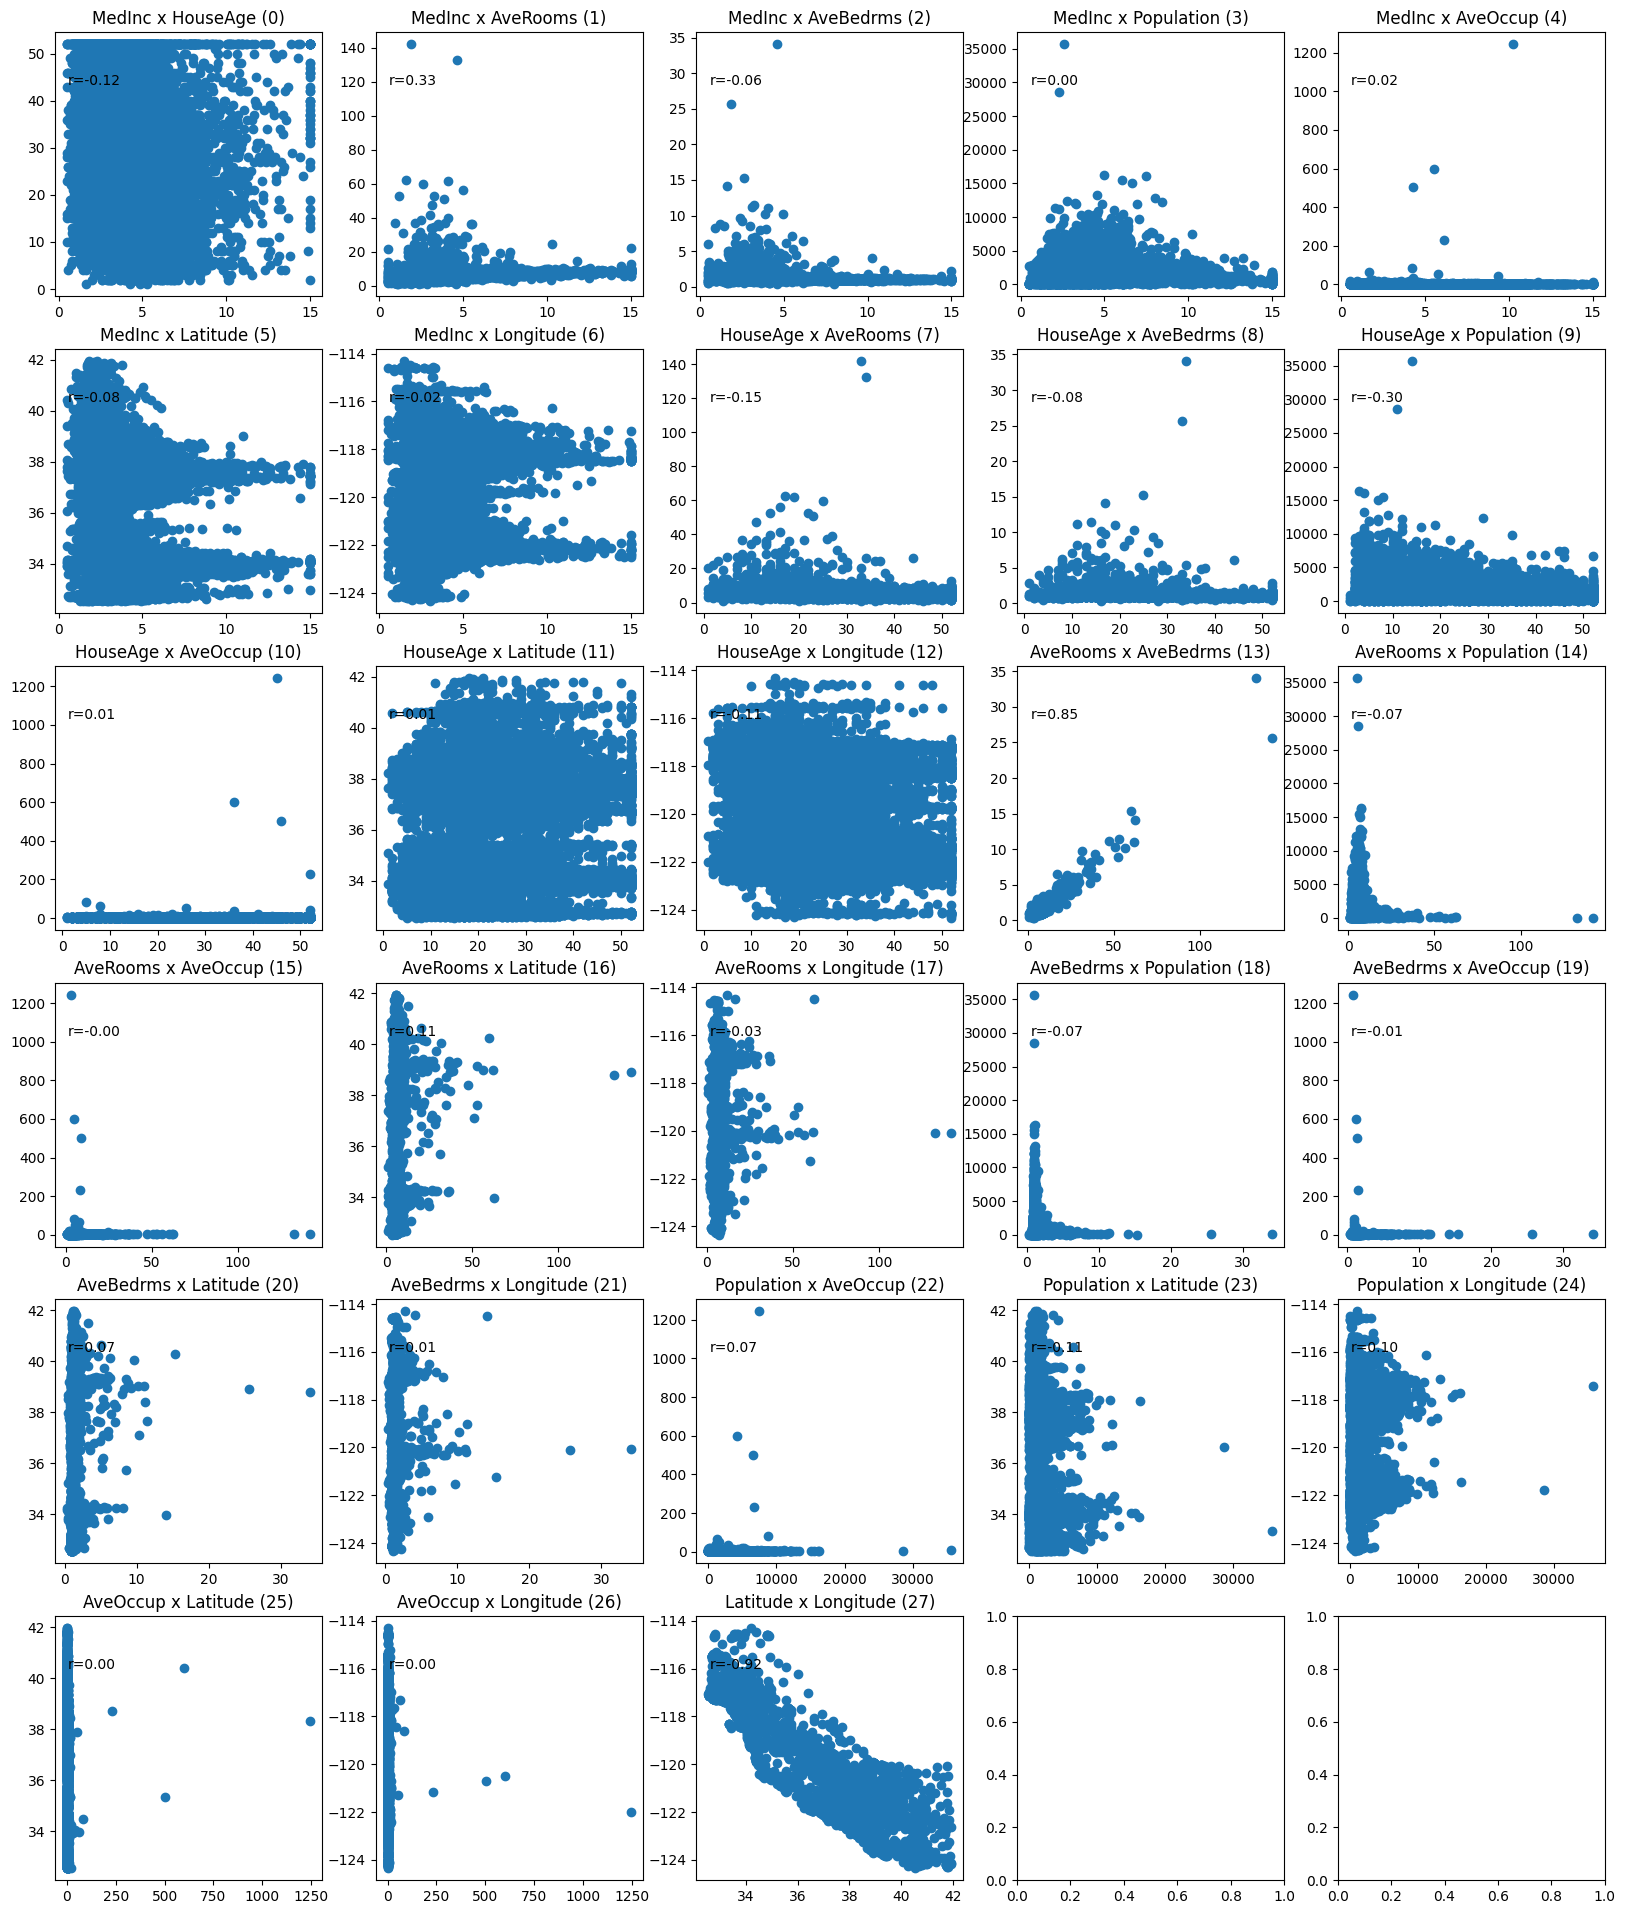

In [ ]:
# obj = VizSelector.create(housing, 'scatter')
# top5 = obj.rank5()
# obj.plt()
# list(map(lambda x: x.get_params()["feature"], obj.rank5()))

# obj = VizSelector.create(housing, 'box')
# top5 = obj.rank5()
# obj.plt()
# list(map(lambda x: x.get_params()["feature"], obj.rank5()))

# obj.plt_all()

# VizSelector.create(housing, "hist").plt()
# VizSelector.create(housing, "box").plt_all()
# VizSelector.create(housing, "scatter").plt_all()

## Plot selection

In [6]:
# # Global variable to store selected plot type
# selected_plot = None
# pltd = {}

# # Function to render the DataFrame with column selection
# def render_dataframe_with_column_selection(df):
#     global selected_plot
    
#     # Options for the plot type dropdown
#     drop_down_options = ("hist", "scatter", "box") ## TODO fetch model map from VizSelector
#     selected_plot = drop_down_options[0]  # Default to the first option
    
#     # Create dropdown widget for plot type selection
#     dropdown = widgets.Dropdown(
#         options=drop_down_options,
#         value=selected_plot,
#         description='Plot type:',
#         disabled=False
#     )
    
#     # Create a button to generate the selected plot
#     button = widgets.Button(description="Generate Plot")
    
#     # Output widget to display the plot
#     output = widgets.Output()
    
#     # Convert the DataFrame to an HTML table
#     html_df = df.head().to_html(index=False, classes='dataframe', border=0)

#     # Define the CSS for table styling
#     # css = ""
#     css = """
#     <style>
#     .dataframe {
#         border-collapse: collapse;
#         width: 100%;
#     }
#     .dataframe th, .dataframe td {
#         border: 1px solid #ddd;
#         padding: 8px;
#     }
#     .dataframe th {
#         background-color: #f2f2f2;
#         text-align: center;
#     }
#     </style>
#     """
    
#     # Combine CSS and HTML table
#     html_content = widgets.HTML(value=css + html_df)
    
#     # Function to handle button click event
#     def on_button_click(b):
#         global selected_plot
#         selected_plot = dropdown.value  # Update selected plot type
#         output.clear_output()  # Clear previous output
        
#         with output:
#             # Generate plot using VizSelector
#             obj = VizSelector.create(df, selected_plot)  # Assuming VizSelector.create is defined
#             top5 = obj.rank5()  # Get top 5 visualizations
#             if selected_plot not in pltd:
#                 pltd[selected_plot] = top5
#             obj.plt()  # Generate the plot
#             display(f"Selected Plot: {selected_plot}")  # Display selected plot type

#     # Bind the button click event to the function
#     button.on_click(on_button_click)
    
#     # Display the dropdown, HTML table, button, and output
#     display(VBox([dropdown, html_content, button, output]))

In [7]:
# import pandas as pd

# # creating a DataFrame
# data = {'Name' : ['Martha', 'Tim', 'Rob', 'Georgia'], ## TODO CODE is not prepare to string time
#         'Maths' : [87, 91, 97, 95],
#         'Science' : [83, 99, 84, 76]}
# df = pd.DataFrame(data)

# df._repr_html_ = render_dataframe_with_column_selection(df)
# # displaying the DataFrame
# # display(df)
# # df

In [13]:
from math import ceil
from matplotlib import pyplot as plt


class InteractiveDataFrame(pd.DataFrame):
    _metadata = ["selected_plot", "pltd"]  # Custom attributes metadata
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.selected_plot = "hist"  # Default plot type
        self.pltd = {}  # To store plotted visualizations

    def get_pltd(self):
        return self.pltd 
    
    def get_viz(self, selector_dict: dict):
        res = {}
        for viz_type, idxs in selector_dict.items(): 
            if viz_type in self.pltd:
                res[viz_type] = [self.pltd[viz_type][idx] for idx in idxs]
        return res  

    @staticmethod
    def plt_from_selector(selector_dict: dict, per_row=3):
        if not selector_dict:
            return
        
        # Calculate the total number of Viz objects
        n_vizs = sum(len(viz_objs) for viz_objs in selector_dict.values())
        
        # Determine the grid size
        n_rows = ceil(n_vizs / per_row)
        n_cols = min(n_vizs, per_row)
        
        # Create subplots and handle single plot case
        fig, axs = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
        axs = axs.flatten() if n_vizs > 1 else [axs]  # Make axs iterable if there's only one plot
        # axs = axs.flatten() if n_vizs > 1 else axs
        
        # Plot each Viz object in the grid
        idx = 0
        for i, viz_objs in enumerate(selector_dict.values()):
            for viz_obj in viz_objs:
                viz_obj.plt(axs=axs[idx]) 
                idx += 1
        
        # Remove any unused subplots
        for i in range(idx, len(axs)):
            fig.delaxes(axs[i])
        
        plt.tight_layout()
        plt.show()
        
    def _render_with_widgets(self):
        # Dropdown options for plot type selection
        drop_down_options = ("hist", "scatter", "box")  # TODO: fetch model map from VizSelector
        dropdown = widgets.Dropdown(
            options=drop_down_options,
            value=self.selected_plot,
            description='Plot type:',
            disabled=False
        )
        
        # Button to generate the selected plot
        button = widgets.Button(description="Generate Plot")
        
        # Output widget to display the plot
        output = widgets.Output()
        
        # Convert DataFrame to an HTML table with styling
        html_df = self.head().to_html(index=False, classes='dataframe', border=0)
        css = """
        <style>
        .dataframe {
            border-collapse: collapse;
            width: 100%;
        }
        .dataframe th, .dataframe td {
            border: 1px solid #ddd;
            padding: 8px;
        }
        .dataframe th {
            background-color: #f2f2f2;
            text-align: center;
        }
        </style>
        """
        
        # Combine CSS and HTML table
        html_content = widgets.HTML(value=css + html_df)
        
        # Function to handle button click event
        def on_button_click(b):
            self.selected_plot = dropdown.value  # Update selected plot type
            output.clear_output()  # Clear previous output
            
            with output:
                # Generate plot using VizSelector
                # print(self)
                obj = VizSelector.create(self, self.selected_plot) 
                top5 = obj.rank5()  # Get top 5 visualizations
                if self.selected_plot not in self.pltd:
                    self.pltd[self.selected_plot] = top5
                obj.plt()  # Generate the plot
                display(f"Selected Plot: {self.selected_plot}")  # Display selected plot type

        # Bind the button click event to the function
        button.on_click(on_button_click)
        
        # Display widgets
        display(VBox([dropdown, html_content, button, output]))

    # def _repr_html_(self):
    #     # Calls render_with_widgets to display the dataframe with widgets in Jupyter
    #     self._render_with_widgets()
    #     return ""  # Return empty string as render_with_widgets handles display
    

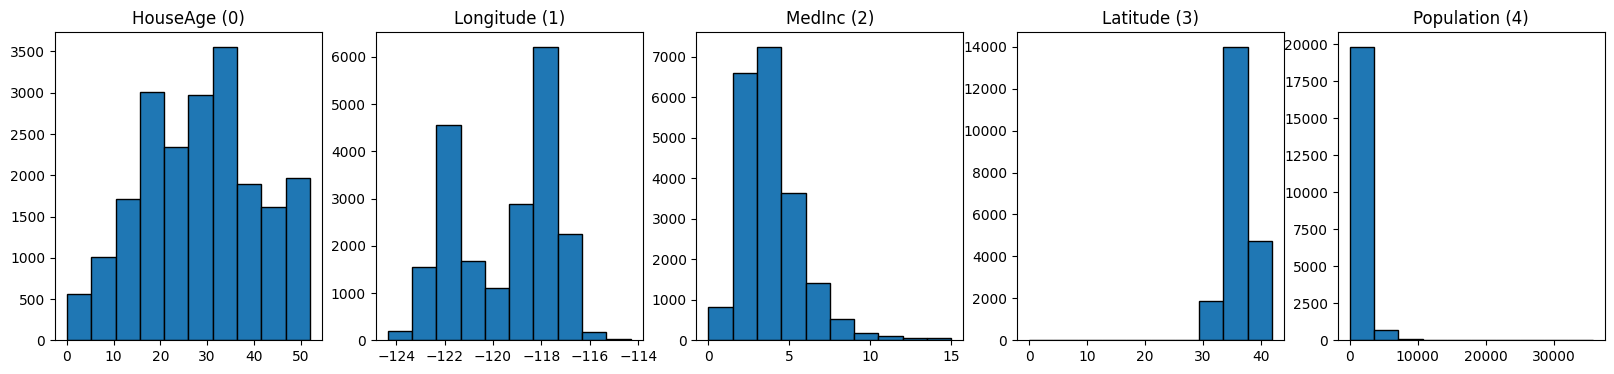

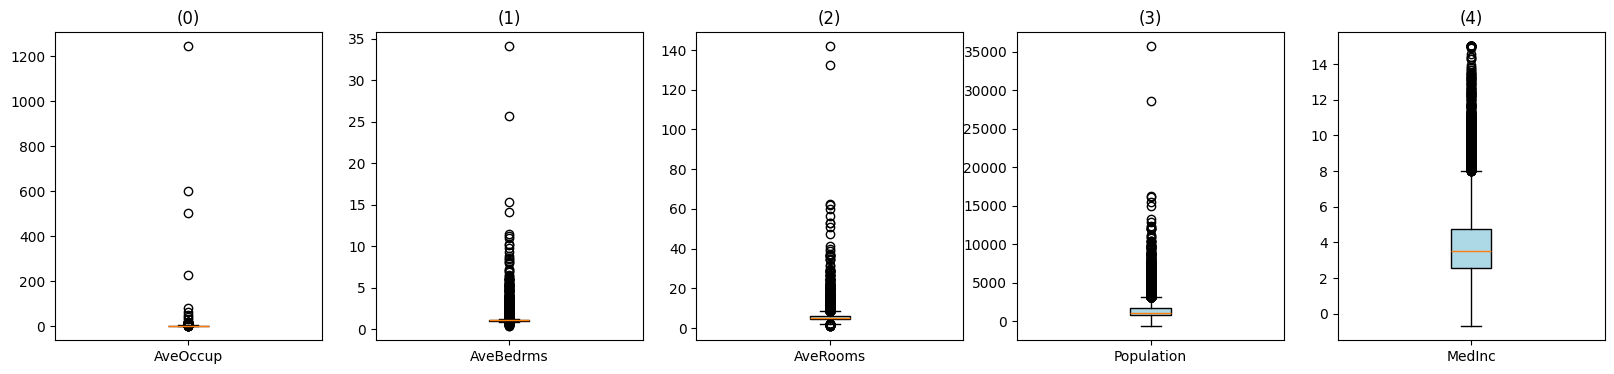

In [16]:
df = InteractiveDataFrame(housing)
df._render_with_widgets()

{'hist': [<utils.chart_types.Histogram object at 0x7d59e81eb640>], 'box': [<utils.chart_types.BoxPlot object at 0x7d59a6ac2e90>, <utils.chart_types.BoxPlot object at 0x7d59a68fe470>, <utils.chart_types.BoxPlot object at 0x7d59a41d01f0>, <utils.chart_types.BoxPlot object at 0x7d59a652d9f0>]}


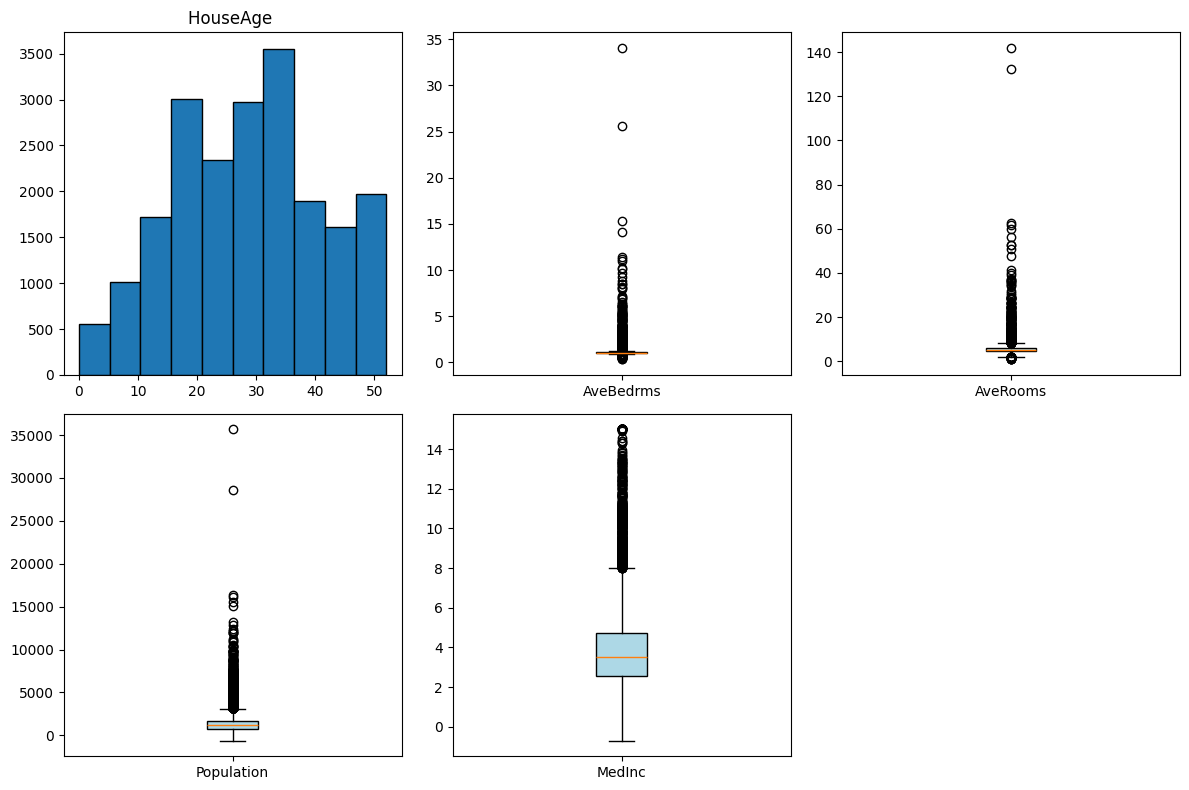

In [17]:
## Saving selected view
selector_plt = df.get_viz({'hist': [0], 'box': [1,2, 3, 4]})
print(selector_plt)

## Ploting from selected views
InteractiveDataFrame.plt_from_selector(selector_plt)

In [ ]:
   
# s = {'hist': [0], 'box': [1,2, 3, 4]}
# # s = {'hist': [0]}
# selector_plt = df.get_viz(s) ## , 'box': [1,2, 3, 4],
# print(selector_plt)
# plt_from_selector(selector_plt)

## Tests

In [ ]:

def get_viz(selector_dict: dict):
    res = {}
    for viz_type, idxs in selector_dict.items(): 
        if viz_type in pltd:
            res[viz_type] = [pltd[viz_type][idx] for idx in idxs]
    return res  

def plt_from_selector(selector_dict: dict, per_row=3):
    if not selector_dict:
        return
    
    n_vizs = 0
    for viz_objs in selector_dict.values():
        n_vizs += len(viz_objs)
    
    row_idx = 0
    col_idx = 0 
    n_rows = ceil(n_vizs/per_row)
    _, axs = plt.subplots(n_rows, per_row, figsize=(4*per_row, 4*n_rows))
    for _, viz_objs in selector_dict.items():
        for viz_obj in viz_objs:
            viz_obj.plt(axs=axs[row_idx][col_idx])
            if(col_idx == per_row-1):
                col_idx = -1
                row_idx += 1
            col_idx += 1

In [ ]:
selector_plt = get_viz({'box': [1,2,3], 'hist': [0]})
print(selector_plt)

plt_from_selector(selector_plt)

{}
